In [116]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Gene Expression </h1>
<h3 align="center"> Christine Zhang </h3>

---

In [117]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

### Dataset Compilation

---

In [118]:
gene_pd = pd.read_csv('../Rees/v21.data.gex_avg_log2.txt', skiprows = [0], sep ="\t", names = ["master_ccl_id", "entrez_id", "gene_exp"])
gene = gene_pd.as_matrix()
gene_pd.head()

,master_ccl_id,entrez_id,gene_exp
0,1,1,5.489103
1,1,3,5.979812
2,1,4,6.583266
3,1,7,6.079415
4,1,8,5.195413


In [119]:
geneexp_expand_pd = pd.read_csv('datasets/gene_exp_precise.csv', sep =",")
geneexp_expand_pd.rename(columns={'0': 'Entrez_id'}, inplace=True)
geneexp_expand_pd["Entrez_id"] = geneexp_expand_pd.Entrez_id.astype(int)
geneexp_expand_pd.set_index('Entrez_id', inplace=True)
geneexp_pd = geneexp_expand_pd.transpose()

In [120]:
entrez_id_lst = geneexp_pd.index
print np.shape(geneexp_pd)
geneexp_pd.head()

(471, 18543)


Entrez_id,100009676,10000,10001,10002,10003,100048912,10004,10005,10006,10007,...,9989,998,9990,9991,9992,9993,9994,9997,999,9
3,5.979812,6.595651,9.663415,4.040661,4.159523,4.099417,4.518963,8.236260,8.543386,10.146590,...,10.824800,5.366379,6.102796,7.611540,4.590955,7.164869,7.092268,9.638273,8.372508,7.915253
7,6.079415,4.521625,8.845639,3.768181,4.044822,4.151676,4.201540,7.922227,9.147535,8.564433,...,8.963671,5.304978,5.231049,8.704089,4.505268,6.679857,9.262698,10.335640,9.852547,10.535870
10,5.373842,6.631749,10.001350,3.610522,4.242035,3.859894,4.561051,8.697279,8.833257,8.895942,...,10.669690,6.068712,5.735501,8.380994,4.505418,6.530644,8.844877,9.305898,4.312173,8.105601
15,6.025009,7.510764,9.289334,3.685390,3.656942,4.138587,4.599801,8.492029,9.341341,9.578695,...,10.812790,5.128864,6.746001,8.342509,4.533303,6.942694,8.538819,8.043184,11.278580,8.478392
16,5.444892,7.544216,8.715909,4.173643,3.663081,4.069507,4.523500,7.735855,9.247934,10.152180,...,9.648020,4.942413,5.591168,8.207547,4.719897,6.646730,8.307294,9.801101,4.339788,8.283828


In [121]:
copynum_expand_pd = pd.read_csv('cndata472_fixed.csv', sep =",")
copynum_expand_pd["Entrez_id"] = copynum_expand_pd.Entrez_id.astype(int)
copynum_expand_pd.set_index('Entrez_id', inplace=True)
copynum_pd = copynum_expand_pd.transpose()

In [122]:
copynum_pd = copynum_pd[copynum_pd.index.isin(entrez_id_lst)]
print np.shape(copynum_pd)
copynum_pd.head()

(471, 23174)


Entrez_id,1,503538,29974,2,144571,144568,3,53947,51146,100506677,...,90834,91149,91316,91450,91948,92249,92973,93432,93622,96610
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,-0.0390,0.0865,0.3492,-0.0328,0.0134,0.0068,0.3753,0.3447,-0.5221,0.3231
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,-0.0574,-0.9972,0.0626,-0.0705,-0.0705,-0.0164,-0.0542,0.4749,-0.0770,0.0626
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,-0.0155,0.3231,-0.0227,0.0947,0.1348,0.3855,-0.2897,-0.4246,-0.0198,0.0390
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,-0.4840,-0.2420,-0.4661,-0.3308,-0.3570,-0.0185,-0.2710,-0.4542,-0.3288,-0.4152
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0834,0.0290,0.1263,0.0286,0.0330,0.0037,0.0684,0.0400,0.0982,0.1263


In [123]:
file_name = "mutation_pd"
file_object = open(file_name,'r')  
mutation_pd = pickle.load(file_object)

In [124]:
mutation_pd = mutation_pd[mutation_pd.index.isin(entrez_id_lst)]
print np.shape(mutation_pd)
mutation_pd.head()

(471, 1530)


Entrez_id,890,4478,2317,6790,120892,4342,4739,6498,8313,10298,...,6608,8522,2885,2161,27255,23072,6725,9149,6241,8301
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
auc_pd = pd.read_csv('dataset1.csv', skiprows = [0,1], sep =",", 
                          names = ["Cclid", "Cellline", "Sites", "Histology", "Subhistology", "Culture", "SNP", "AUC"])
auc = auc_pd.as_matrix()
auc_pd.head()

,Cclid,Cellline,Sites,Histology,Subhistology,Culture,SNP,AUC
0,3,5637,urinary_tract,carcinoma,NS,RPMI001,SNP-matched-reference,2.473
1,7,22RV1,prostate,carcinoma,NS,RPMI001,SNP-matched-reference,2.142
2,10,42MGBA,central_nervous_system,glioma,astrocytoma_Grade_IV,RPMIMEM001,SNP-matched-reference,3.380
3,15,647V,urinary_tract,carcinoma,transitional_cell_carcinoma,DMEM011,SNP-matched-reference,3.374
4,16,769P,kidney,carcinoma,clear_cell_renal_cell_carcinoma,RPMI001,SNP-matched-reference,3.123


In [126]:
auc_lst = []
for index, cclid in enumerate(auc_pd["Cclid"]):
    if str(cclid) in entrez_id_lst:
        auc_lst.append(auc_pd["AUC"][index])
auc_lst = np.array(auc_lst)
auc_lst = auc_lst.reshape([471,1])
print np.shape(auc_lst)

(471, 1)


In [127]:
cn_mut_exp_pd = copynum_pd.merge(geneexp_pd, how="right", left_index = True, right_index = True).merge(mutation_pd, how="outer", left_index = True, right_index = True)
print np.shape(cn_mut_exp_pd)
cn_mut_exp_pd.columns = cn_mut_exp_pd.columns.astype(str)
cn_mut_exp_pd.head()

(471, 43247)


Entrez_id,1_x,503538_x,29974_x,2_x,144571_x,144568_x,3,53947_x,51146_x,100506677,...,6608,8522,2885,2161,27255,23072,6725,9149,6241,8301
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
inttotest = 51146
cn_mut_exp_pd[[col for col in cn_mut_exp_pd.columns if (str(col).startswith(str(inttotest)+"_") or str(col) == str(inttotest))]].head()

Entrez_id,51146_x,51146_y
3,0.0518,4.208724
7,-0.0303,3.965432
10,-0.2675,3.784946
15,0.2831,4.017701
16,0.0468,3.989604


In [ ]:
file_name = "datasets/cn_mut_exp_pd"
with open(file_name,'wb') as my_file_obj:
    pickle.dump(cn_mut_exp_pd,my_file_obj)

### All Data

---

In [129]:
# encode categorical variables
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array

# apply one hot encoding
def one_hot (dataframe): 
    sites_lst = []
    for index, val in enumerate(auc_pd["Cclid"]):
        if str(val) in list(dataframe.index):
            sites_lst.append(auc_pd.loc[index,"Sites"])
    dataframe.loc[:,"Sites"] = sites_lst
    
    # Categorical columns for use in one-hot encoder
    categorical = (dataframe.dtypes.values != np.dtype('float64'))

    # Encode all labels
    dataframe = dataframe.apply(encode_categorical)
    dataframe_np = dataframe.as_matrix()
    return dataframe_np, dataframe

# apply binary one hot encoding
def binary_one_hot (dataframe): 
    sites_lst = []
    for index, val in enumerate(auc_pd["Cclid"]):
        if str(val) in list(dataframe.index):
            sites_lst.append(auc_pd.loc[index,"Sites"])
    dataframe["Sites"] = sites_lst
    
    dataframe_binary_pd = pd.get_dummies(dataframe)
    dataframe_binary = dataframe_binary_pd.as_matrix()

    return dataframe_binary, dataframe_binary_pd

In [130]:
all_onehot, all_onehot_pd = one_hot (cn_mut_exp_pd)
all_binary, all_binary_pd = binary_one_hot (cn_mut_exp_pd)

In [131]:
linreg = LinearRegression()
svr_rbf = SVR(kernel = "rbf")
svr_lin = SVR(kernel = "linear")
rf = RandomForestRegressor()
lasso = linear_model.Lasso(alpha=0.1)
net = linear_model.ElasticNet(alpha=0.1)

# test naive models
def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

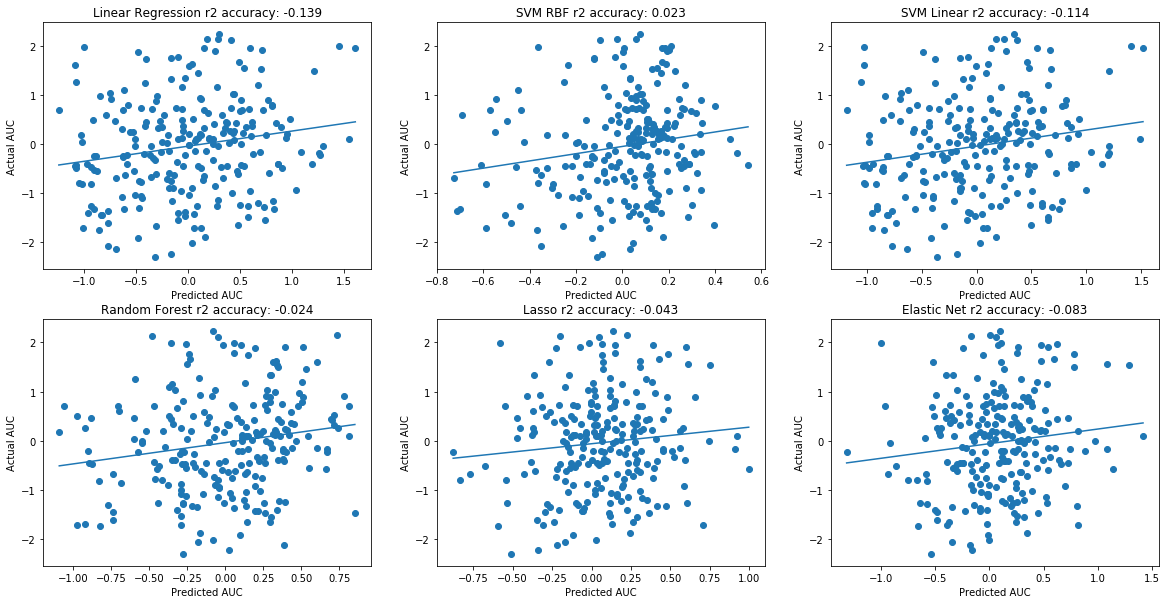

In [132]:
all_onehot_scaled = preprocessing.scale(all_onehot)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred, r2_linreg = test_model (linreg)
svr_rbf_y_pred, r2_svr_rbf = test_model (svr_rbf)
svr_lin_y_pred, r2_svr_lin = test_model (svr_lin)
rf_y_pred, r2_rf = test_model (rf)
y_pred_lasso, r2_lasso = test_model (lasso)
y_pred_net, r2_net = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred, "Linear Regression", r2_linreg)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred, "SVM RBF", r2_svr_rbf)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred, "SVM Linear", r2_svr_lin)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred, "Random Forest", r2_rf)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso, "Lasso", r2_lasso)
ax[1,2] = draw_plot (ax[1,2], y_pred_net, "Elastic Net", r2_net)

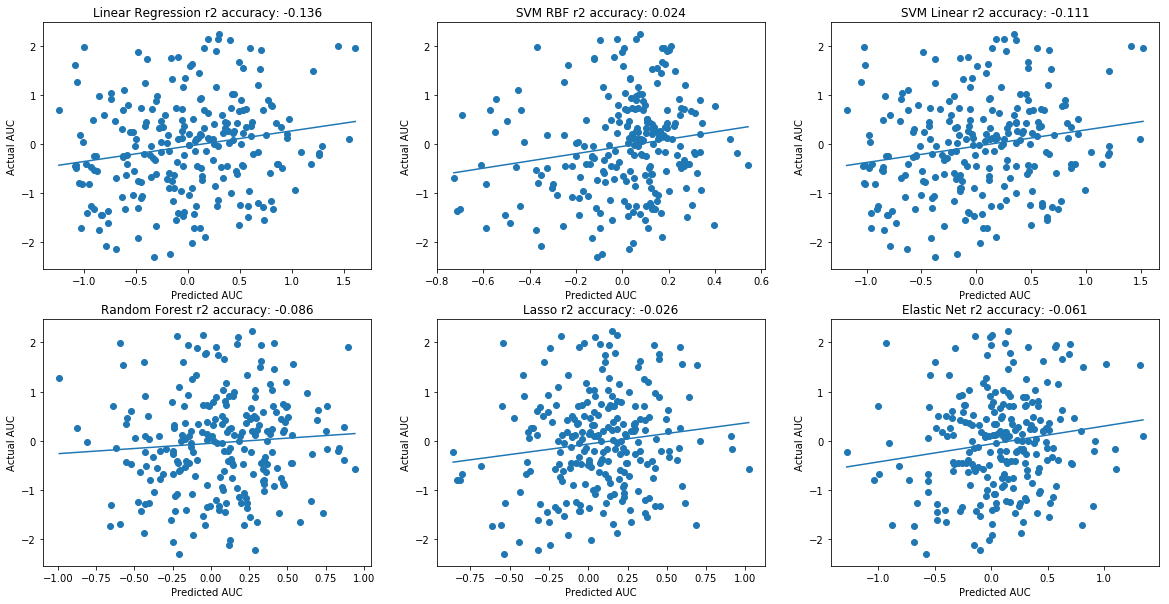

In [133]:
all_onehot_scaled = preprocessing.scale(all_binary)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_binary, r2_linreg_binary = test_model (linreg)
svr_rbf_y_pred_binary, r2_svr_rbf_binary = test_model (svr_rbf)
svr_lin_y_pred_binary, r2_svr_lin_binary = test_model (svr_lin)
rf_y_pred_binary, r2_rf_binary = test_model (rf)
y_pred_lasso_binary, r2_lasso_binary = test_model (lasso)
y_pred_net_binary, r2_net_binary = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_binary, "Linear Regression", r2_linreg_binary)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_binary, "SVM RBF", r2_svr_rbf_binary)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_binary, "SVM Linear", r2_svr_lin_binary)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_binary, "Random Forest", r2_rf_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_binary, "Lasso", r2_lasso_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_binary, "Elastic Net", r2_net_binary)

### Just Gene Expression 

---

In [134]:
all_onehot, all_onehot_pd = one_hot (geneexp_pd)
all_binary, all_binary_pd = binary_one_hot (geneexp_pd)

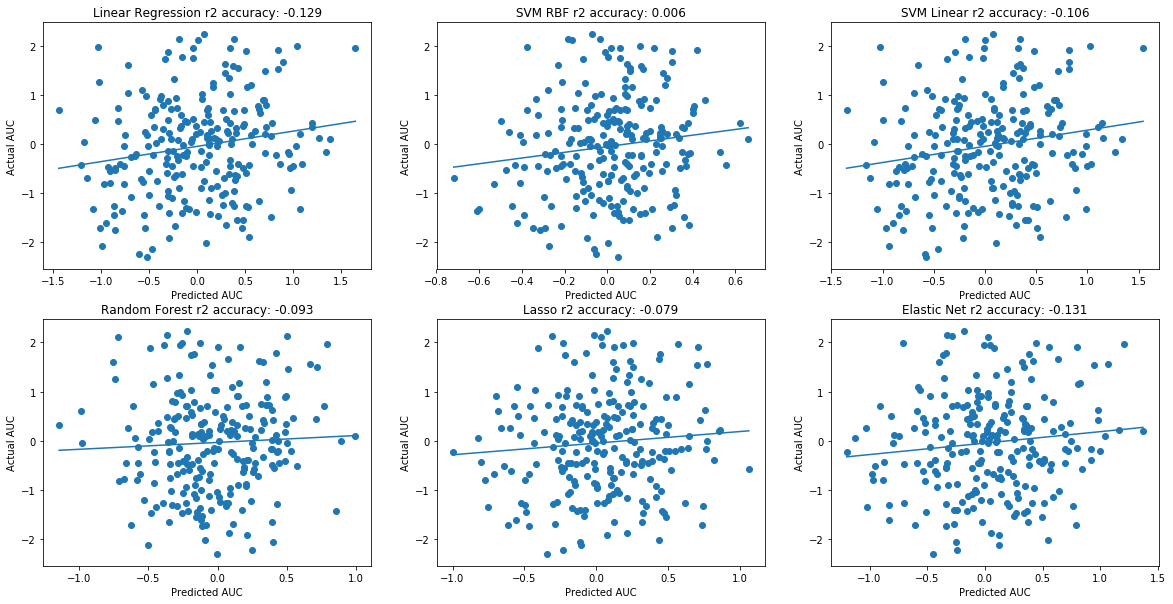

In [135]:
all_onehot_scaled = preprocessing.scale(all_onehot)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_gene, r2_linreg_gene = test_model (linreg)
svr_rbf_y_pred_gene, r2_svr_rbf_gene = test_model (svr_rbf)
svr_lin_y_pred_gene, r2_svr_lin_gene = test_model (svr_lin)
rf_y_pred_gene, r2_rf_gene = test_model (rf)
y_pred_lasso_gene, r2_lasso_gene = test_model (lasso)
y_pred_net_gene, r2_net_gene = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_gene, "Linear Regression", r2_linreg_gene)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_gene, "SVM RBF", r2_svr_rbf_gene)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_gene, "SVM Linear", r2_svr_lin_gene)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_gene, "Random Forest", r2_rf_gene)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_gene, "Lasso", r2_lasso_gene)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_gene, "Elastic Net", r2_net_gene)

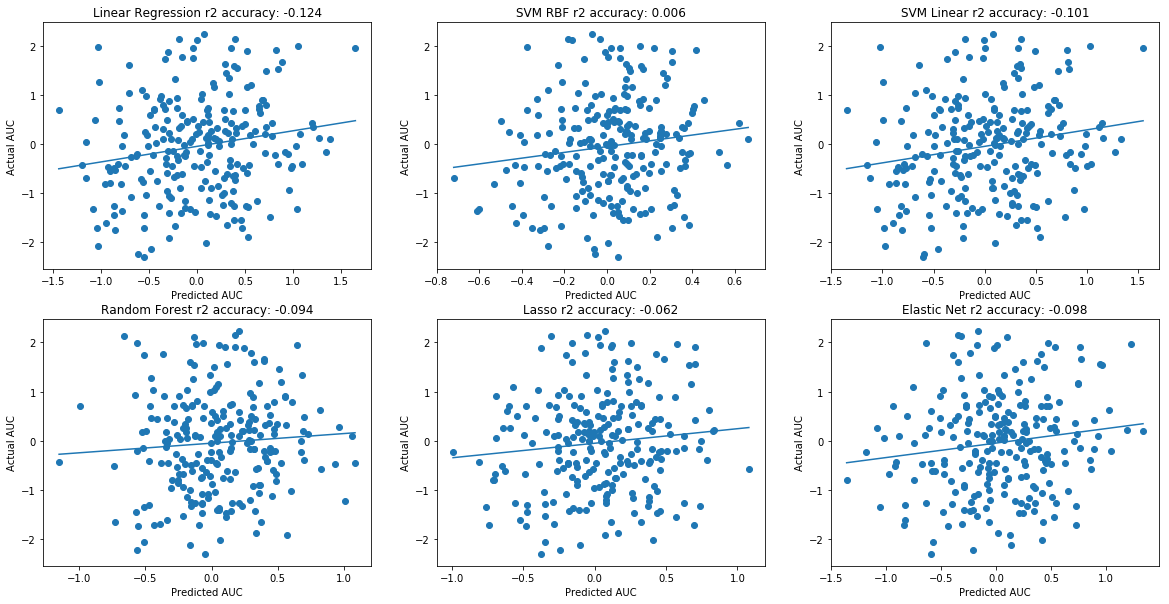

In [136]:
all_onehot_scaled = preprocessing.scale(all_binary)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(all_onehot_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_gene_binary, r2_linreg_gene_binary = test_model (linreg)
svr_rbf_y_pred_gene_binary, r2_svr_rbf_gene_binary = test_model (svr_rbf)
svr_lin_y_pred_gene_binary, r2_svr_lin_gene_binary = test_model (svr_lin)
rf_y_pred_gene_binary, r2_rf_gene_binary = test_model (rf)
y_pred_lasso_gene_binary, r2_lasso_gene_binary = test_model (lasso)
y_pred_net_gene_binary, r2_net_gene_binary = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_gene_binary, "Linear Regression", r2_linreg_gene_binary)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_gene_binary, "SVM RBF", r2_svr_rbf_gene_binary)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_gene_binary, "SVM Linear", r2_svr_lin_gene_binary)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_gene_binary, "Random Forest", r2_rf_gene_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_gene_binary, "Lasso", r2_lasso_gene_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_gene_binary, "Elastic Net", r2_net_gene_binary)

### PCA

---

In [137]:
def PCA_apply (dataframe):
    dataframe = dataframe.transpose()
    master_cclid = dataframe.as_matrix()
    pca = PCA(n_components=10)
    scaled_data = preprocessing.scale(master_cclid)
    pca.fit(scaled_data)    
    pca.transform(scaled_data)
    pca_components_pd = pd.DataFrame(data = pca.components_, columns = dataframe.columns.values).transpose()
    pca_components = pca_components_pd.as_matrix()
    print "Amount of Variance explained by each component: ", pca.explained_variance_ratio_
    print "Total Variance Captured", np.sum(pca.explained_variance_ratio_)
    return pca_components

In [138]:
pca_components_onehot = PCA_apply(all_onehot_pd)
pca_components_binary = PCA_apply(all_binary_pd)

Amount of Variance explained by each component:  [ 0.87479096  0.01463493  0.00756263  0.00399731  0.0035383   0.0031237
  0.00270822  0.0024116   0.00210049  0.00191942]
Total Variance Captured 0.916787559658
Amount of Variance explained by each component:  [ 0.87601408  0.01452125  0.00749709  0.00396638  0.00350456  0.00309407
  0.00268534  0.00238934  0.00208116  0.00190335]
Total Variance Captured 0.917656625579


/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


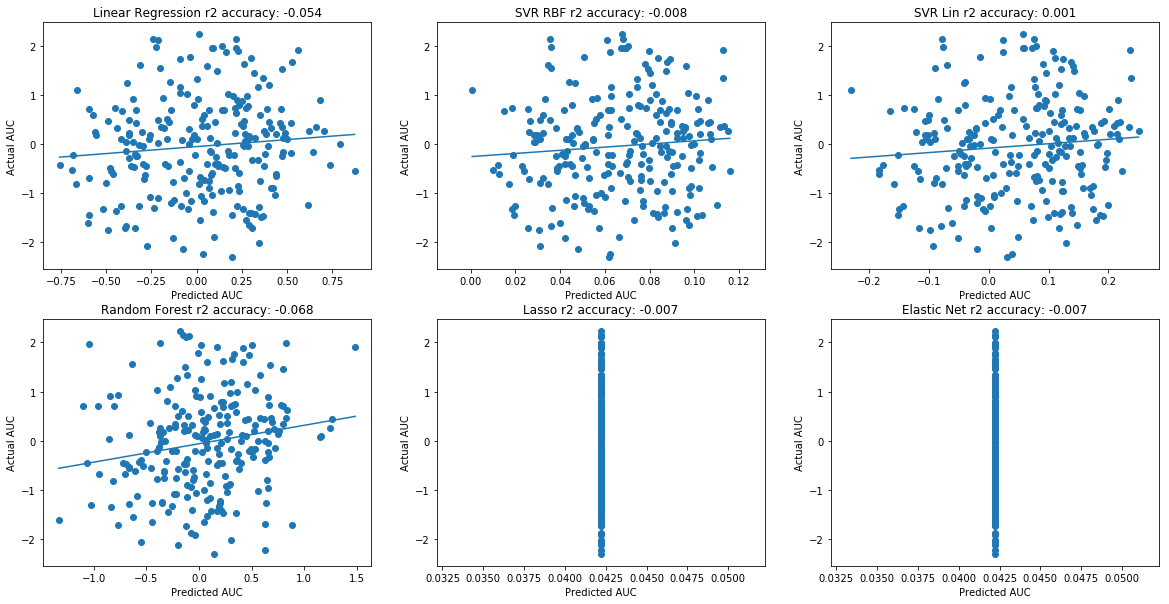

In [139]:
x_train, x_test, y_train, y_test = train_test_split(pca_components_onehot, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
y_pred_linreg_PCA, r2_linreg_PCA = test_model (linreg)
y_pred_svr_rbf_PCA, r2_svr_rbf_PCA = test_model (svr_rbf)
y_pred_svr_lin_PCA, r2_svr_lin_PCA = test_model (svr_lin)
y_pred_rf_PCA, r2_rf_PCA = test_model (rf)
y_pred_lasso_PCA, r2_lasso_PCA = test_model (lasso)
y_pred_net_PCA, r2_net_PCA = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA, "Linear Regression", r2_linreg_PCA)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA, "SVR RBF", r2_svr_rbf_PCA)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA, "SVR Lin", r2_svr_lin_PCA)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA, "Random Forest", r2_rf_PCA)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA, "Lasso", r2_lasso_PCA)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA, "Elastic Net", r2_net_PCA)

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


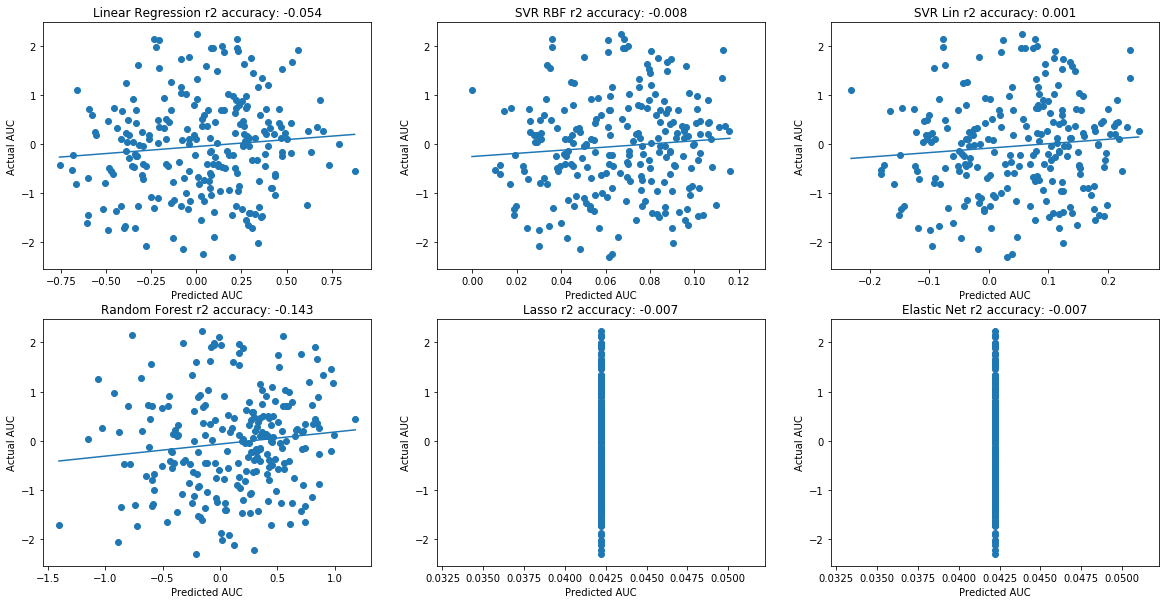

In [140]:
x_train, x_test, y_train, y_test = train_test_split(pca_components_binary, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
y_pred_linreg_PCA_binary, r2_linreg_PCA_binary = test_model (linreg)
y_pred_svr_rbf_PCA_binary, r2_svr_rbf_PCA_binary = test_model (svr_rbf)
y_pred_svr_lin_PCA_binary, r2_svr_lin_PCA_binary = test_model (svr_lin)
y_pred_rf_PCA_binary, r2_rf_PCA_binary = test_model (rf)
y_pred_lasso_PCA_binary, r2_lasso_PCA_binary = test_model (lasso)
y_pred_net_PCA_binary, r2_net_PCA_binary = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], y_pred_linreg_PCA_binary, "Linear Regression", r2_linreg_PCA_binary)
ax[0,1] = draw_plot (ax[0,1], y_pred_svr_rbf_PCA_binary, "SVR RBF", r2_svr_rbf_PCA_binary)
ax[0,2] = draw_plot (ax[0,2], y_pred_svr_lin_PCA_binary, "SVR Lin", r2_svr_lin_PCA_binary)
ax[1,0] = draw_plot (ax[1,0], y_pred_rf_PCA_binary, "Random Forest", r2_rf_PCA_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_PCA_binary, "Lasso", r2_lasso_PCA_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_PCA_binary, "Elastic Net", r2_net_PCA_binary)

### Gene Selection

---

In [141]:
entrez_pd = pd.read_csv('../EntrezID.txt', skiprows = [0], sep ="\t", names = ["Hugo", "Symbol", "Entrez_ID"]) 
entrez = entrez_pd.as_matrix()
entrez_pd.head()

,Hugo,Symbol,Entrez_ID
0,HGNC:5,A1BG,1.0
1,HGNC:37133,A1BG-AS1,503538.0
2,HGNC:24086,A1CF,29974.0
3,HGNC:6,A1S9T~withdrawn,NaN
4,HGNC:7,A2M,2.0


In [142]:
gene_lst_pd = pd.read_csv("gene_list.txt", names=["Genes"])
gene_lst = gene_lst_pd.as_matrix()
print np.shape(gene_lst)
gene_lst_pd.head()

(118, 1)


,Genes
0,CDKN2A-AS1
1,CDKN2A
2,PRKN
3,TP53BP1
4,AKT1


In [143]:
entrez_id_lst = []
symbol_lst = list(entrez[:,1])
for gene in gene_lst:
    if gene in symbol_lst:
        entrez_id_lst.append(entrez[symbol_lst.index(gene),2])
    else:
        entrez_id_lst.append(-1)

In [144]:
gene_lst_pd["Entrez_id"] = entrez_id_lst
gene_lst_pd.head()

,Genes,Entrez_id
0,CDKN2A-AS1,51198.0
1,CDKN2A,1029.0
2,PRKN,5071.0
3,TP53BP1,7158.0
4,AKT1,207.0


In [145]:
def select_columns(inttotest):
    selected_pd = cn_mut_exp_pd[[col for col in cn_mut_exp_pd.columns if (str(col).startswith(str(inttotest)+"_") or str(col) == str(inttotest))]].head()
    return selected_pd.columns.values

full_column_lst = []
for each_int in entrez_id_lst[:50]:
    selected_columns = select_columns(int(each_int))
    full_column_lst.append(selected_columns)   
full_column_lst = np.concatenate(full_column_lst)

In [146]:
master_no_auc_selected_pd = cn_mut_exp_pd.loc[:,cn_mut_exp_pd.columns.intersection(full_column_lst)]
master_no_auc_onehot, master_no_auc_onehot_pd = one_hot (master_no_auc_selected_pd)
master_no_auc_binary, master_no_auc_binary_pd = one_hot (master_no_auc_selected_pd)

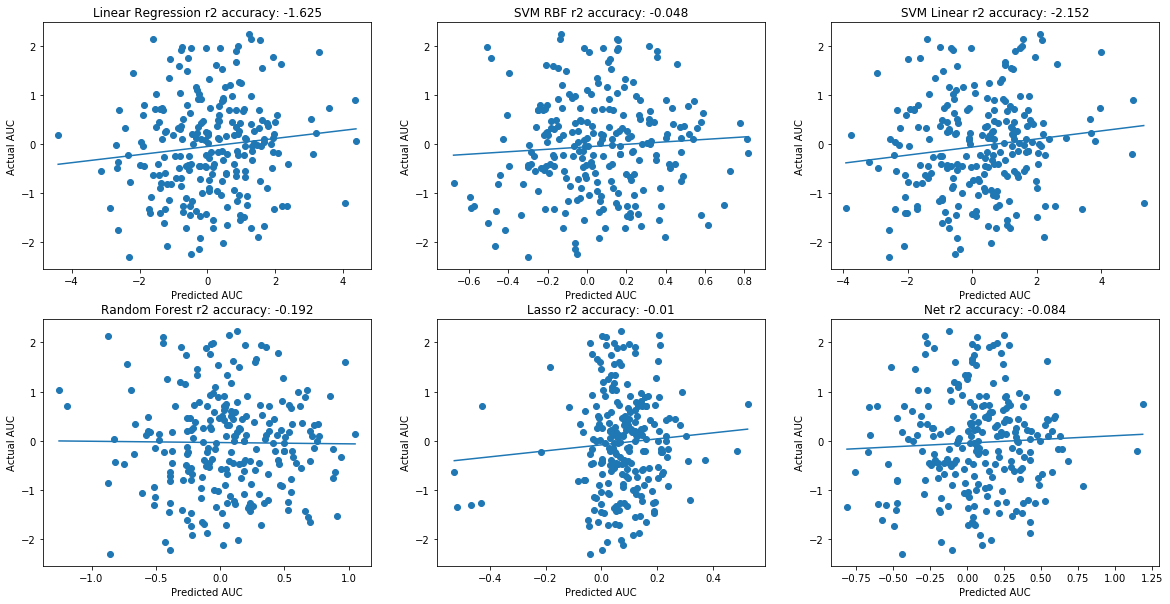

In [147]:
master_no_auc_selected_scaled = preprocessing.scale(master_no_auc_onehot)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(master_no_auc_selected_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_selected, r2_linreg_selected = test_model (linreg)
svr_rbf_y_pred_selected, r2_svr_rbf_selected = test_model (svr_rbf)
svr_lin_y_pred_selected, r2_svr_lin_selected = test_model (svr_lin)
rf_y_pred_selected, r2_rf_selected = test_model (rf)
y_pred_lasso_selected, r2_lasso_selected = test_model (lasso)
y_pred_net_selected, r2_net_selected = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_selected, "Linear Regression", r2_linreg_selected)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_selected, "SVM RBF", r2_svr_rbf_selected)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_selected, "SVM Linear", r2_svr_lin_selected)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_selected, "Random Forest", r2_rf_selected)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_selected, "Lasso", r2_lasso_selected)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_selected, "Net", r2_net_selected)


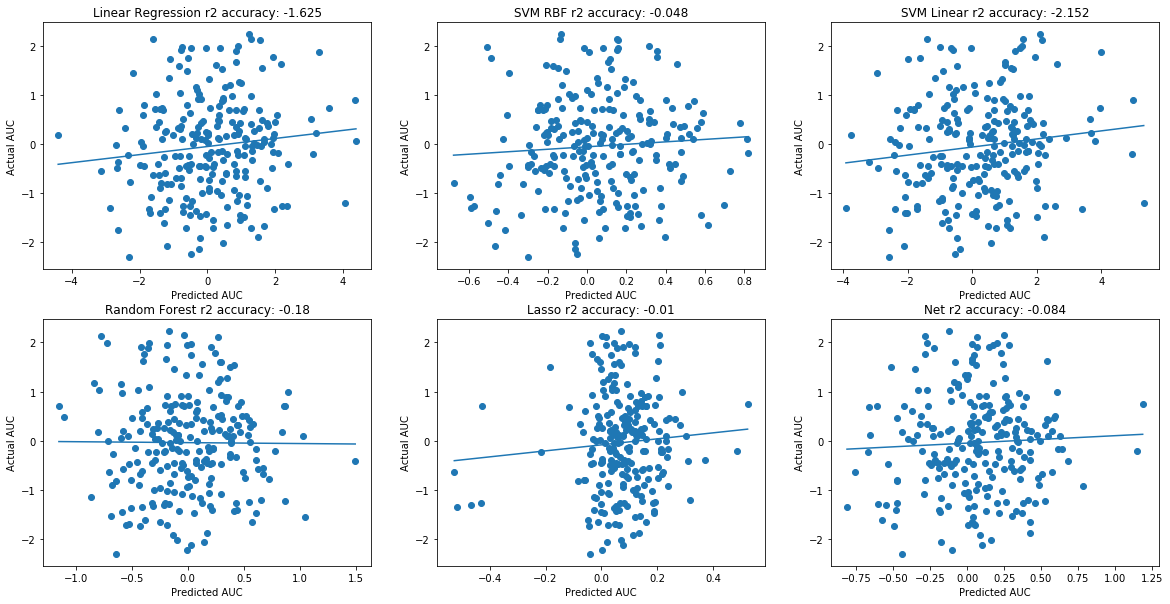

In [148]:
master_no_auc_selected_scaled = preprocessing.scale(master_no_auc_binary)
master_auc_scaled = preprocessing.scale(auc_lst)

x_train, x_test, y_train, y_test = train_test_split(master_no_auc_selected_scaled, master_auc_scaled, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_selected_binary, r2_linreg_selected_binary = test_model (linreg)
svr_rbf_y_pred_selected_binary, r2_svr_rbf_selected_binary = test_model (svr_rbf)
svr_lin_y_pred_selected_binary, r2_svr_lin_selected_binary = test_model (svr_lin)
rf_y_pred_selected_binary, r2_rf_selected_binary = test_model (rf)
y_pred_lasso_selected_binary, r2_lasso_selected_binary = test_model (lasso)
y_pred_net_selected_binary, r2_net_selected_binary = test_model (net)

fig_all, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0,0] = draw_plot (ax[0,0], linreg_y_pred_selected_binary, "Linear Regression", r2_linreg_selected_binary)
ax[0,1] = draw_plot (ax[0,1], svr_rbf_y_pred_selected_binary, "SVM RBF", r2_svr_rbf_selected_binary)
ax[0,2] = draw_plot (ax[0,2], svr_lin_y_pred_selected_binary, "SVM Linear", r2_svr_lin_selected_binary)
ax[1,0] = draw_plot (ax[1,0], rf_y_pred_selected_binary, "Random Forest", r2_rf_selected_binary)
ax[1,1] = draw_plot (ax[1,1], y_pred_lasso_selected_binary, "Lasso", r2_lasso_selected_binary)
ax[1,2] = draw_plot (ax[1,2], y_pred_net_selected_binary, "Net", r2_net_selected_binary)

In [149]:
score_df = pd.DataFrame({'Linear Regression': [r2_linreg, r2_linreg_binary, r2_linreg_PCA, r2_linreg_PCA_binary, r2_linreg_gene, r2_linreg_gene_binary, r2_linreg_selected, r2_linreg_selected_binary],
                         'SVM RBF': [r2_svr_rbf, r2_svr_rbf_binary, r2_svr_rbf_PCA, r2_svr_rbf_PCA_binary, r2_svr_rbf_gene, r2_svr_rbf_gene_binary, r2_svr_rbf_selected, r2_svr_rbf_selected_binary],
                         'SVM Linear': [r2_svr_lin, r2_svr_lin_binary, r2_svr_lin_PCA, r2_svr_lin_PCA_binary, r2_svr_lin_gene, r2_svr_lin_gene_binary, r2_svr_lin_selected, r2_svr_lin_selected_binary],
                         'Random Forest': [r2_rf, r2_rf_binary, r2_rf_PCA, r2_rf_PCA_binary, r2_rf_gene, r2_rf_gene_binary, r2_rf_selected, r2_rf_selected_binary],
                         'Lasso': [r2_lasso, r2_lasso_binary, r2_lasso_PCA, r2_lasso_PCA_binary, r2_lasso_gene, r2_lasso_gene_binary, r2_lasso_selected, r2_lasso_selected_binary],
                         'Net': [r2_net, r2_net_binary, r2_net_PCA, r2_net_PCA_binary, r2_net_gene, r2_net_gene_binary, r2_net_selected, r2_net_selected_binary]}, 
                       index=["All", "All Binary", "PCA","PCA Binary", "Gene Expression Only", "Gene Expression Binary", "Gene Selection", "Gene Selection Binary"])
score_df

,Lasso,Linear Regression,Net,Random Forest,SVM Linear,SVM RBF
All,-0.042782,-0.139170,-0.082659,-0.023820,-0.113867,0.023466
All Binary,-0.026096,-0.136056,-0.061476,-0.086302,-0.111425,0.023666
PCA,-0.007084,-0.053617,-0.007084,-0.067679,0.001036,-0.007983
PCA Binary,-0.007084,-0.053855,-0.007084,-0.143461,0.001196,-0.007962
Gene Expression Only,-0.078965,-0.128770,-0.130709,-0.092713,-0.105806,0.005650
Gene Expression Binary,-0.062242,-0.123968,-0.097589,-0.094234,-0.101488,0.006330
Gene Selection,-0.010070,-1.625013,-0.083839,-0.192199,-2.152344,-0.048356
Gene Selection Binary,-0.010070,-1.625013,-0.083839,-0.180303,-2.152344,-0.048356
